In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

1 - Separe os dados em treino (80%) e teste (20%).

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UFC/2021.1/ML/dataset/diabetes.csv')

In [4]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

2 - Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:







1. Mostre a importância das features.


In [6]:
model = tree.DecisionTreeClassifier(random_state=10)
model.fit(X_treino, y_treino);
model.feature_importances_

1.0

2. Desenhe a árvore de decisão.


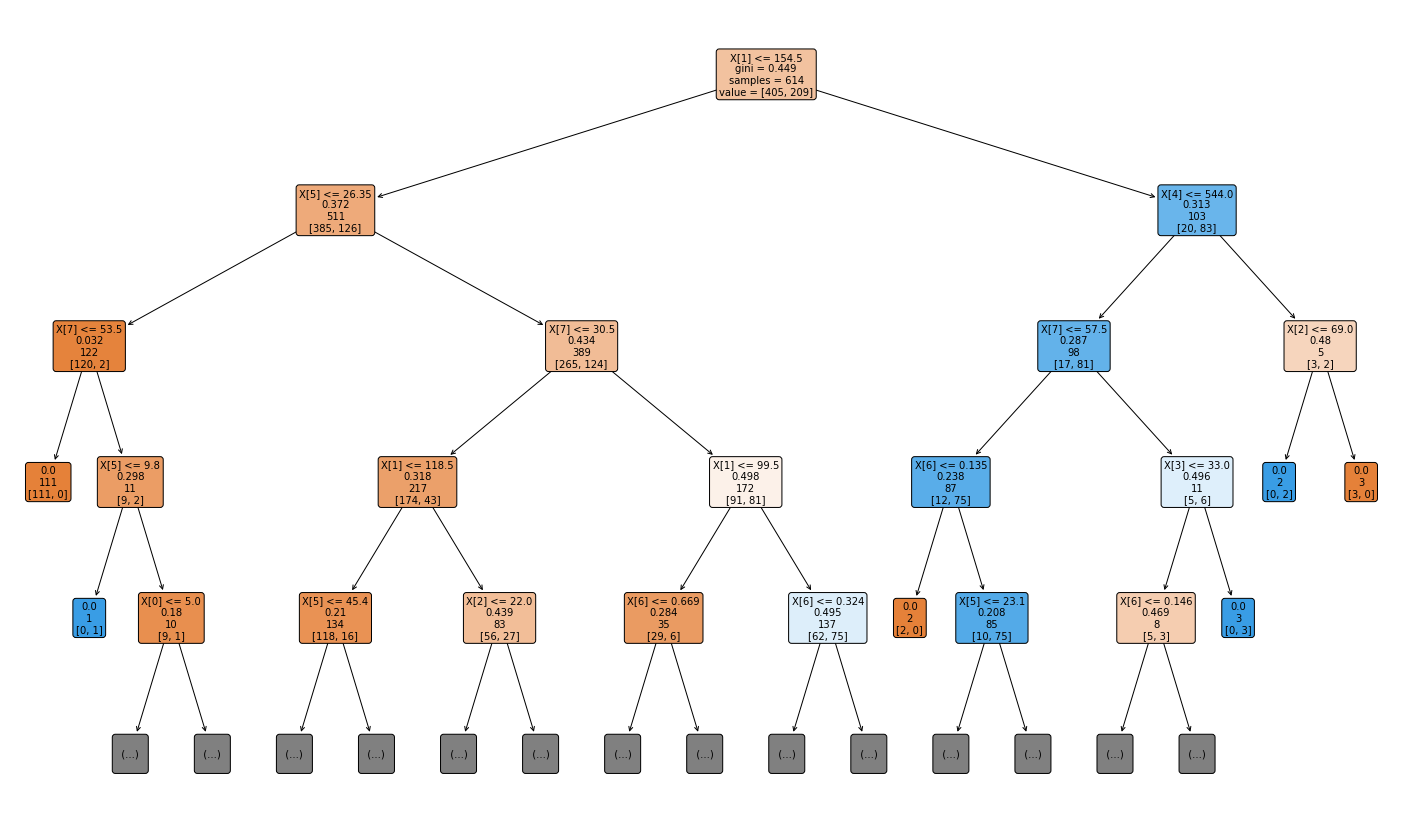

In [10]:
plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True, rounded=True, max_depth=4, fontsize=10, label='root');
plt.show()

3. Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.


In [ ]:
y_pred = model.predict(X_teste)
print(metrics.f1_score(y_teste,y_pred))

0.5739130434782609


3 - Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no seguinte documento, mas não precisa usar k-Fold Cross Validation.

In [ ]:
clf1 = LogisticRegression(penalty='l2', solver='liblinear', C=0.001, random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=10)
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = svm.SVC()

In [ ]:
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])
pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])

pipe5 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf5]])

pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])

In [ ]:
clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'GaussianNB', 'SVM']

In [ ]:
for clf, label in zip([pipe1, clf2, pipe3, pipe4, pipe5], clf_labels):
    clf.fit(X_treino, y_treino)
    y_pred = clf.predict(X_teste)
    scores = metrics.f1_score(y_teste,y_pred)
    print('F1-Score: {:.3f}'.format(metrics.f1_score(y_teste,y_pred)), label)

F1-Score: 0.613 Logistic regression
F1-Score: 0.574 Decision tree
F1-Score: 0.447 KNN
F1-Score: 0.577 GaussianNB
F1-Score: 0.589 SVM


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = LogisticRegression(penalty='l2', solver='liblinear', C=0.001, random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=10)
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = svm.SVC()

In [ ]:
classifiers = [('Logistic Regression', pipe1),('Decision Tree', clf2), ('K Nearest Neighbours', pipe3), ('GaussianNB', pipe4) ,
               ('SVM', pipe5)]

In [ ]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_treino, y_treino)
y_pred = vc.predict(X_teste)
print('Voting Classifier: {:.3f}'.format(metrics.f1_score(y_teste,y_pred)))

Voting Classifier: 0.600


4 - Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se basear no seguinte documento.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10, random_state=10)
model_rf = RandomForestClassifier(max_depth=10, random_state=10, max_features='log2')
model_ab = AdaBoostClassifier(n_estimators=50, random_state=10)
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=10)

In [ ]:
clf_labels = ['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting']

In [ ]:
for clf, label in zip([model_dt, model_rf, model_ab, model_gb], clf_labels):
    bc = BaggingClassifier(base_estimator=clf, n_estimators=50, n_jobs=-1,random_state=10)
    bc.fit(X_treino,y_treino)
    y_pred = bc.predict(X_teste)
    scores = metrics.f1_score(y_teste,y_pred)
    print('F1-Score: {:.3f}'.format(metrics.f1_score(y_teste,y_pred)), label)

F1-Score: 0.673 Decision Tree
F1-Score: 0.611 Random Forest
F1-Score: 0.660 Ada Boost
F1-Score: 0.660 Gradient Boosting


In [ ]:
#Decision Tree
model_dt.fit(X_treino,y_treino)
model_dt.feature_importances_

array([0.05338137, 0.35519153, 0.08632158, 0.04440186, 0.05944464,
       0.16504387, 0.12071276, 0.11550239])

In [ ]:
#Random Forest
model_rf.fit(X_treino,y_treino)
model_rf.feature_importances_

array([0.07794734, 0.30278188, 0.08285708, 0.06625469, 0.06045348,
       0.15049294, 0.11591446, 0.14329813])

In [ ]:
#Ada Boost
model_ab.fit(X_treino,y_treino)
model_ab.feature_importances_

array([0.04, 0.2 , 0.04, 0.04, 0.1 , 0.12, 0.26, 0.2 ])

In [ ]:
#Gradient Boosting
model_gb.fit(X_treino,y_treino)
model_gb.feature_importances_

array([0.06038814, 0.31304047, 0.0929558 , 0.03714706, 0.05652832,
       0.18214642, 0.12866057, 0.12913322])